# Drill: More clusters?
Your task is to take the 𝑘 -means code here and see what happens when you change the value of 𝑘. What solution, if any, do you find most compelling? Does complexity start to become an issue with this data set? Play around a bit and write up your findings and your process to share with your mentor. Keep in mind that it may be possible to have a solution with more than two clusters that is still better at tracking the real binary outcome – two of those clusters may map to "heart disease" while the other maps to "no heart disease," for example.

In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from IPython.display import Markdown, display
import warnings


In [2]:
# get data
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

To make it easier to visualize our potential clusters, we will reduce the data to 2 components using PCA.


Running kMeans for k=3


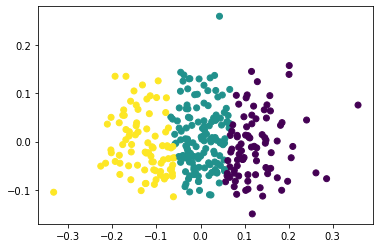

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      25  59
1      64  71
2      50  34 


Running kMeans for k=4


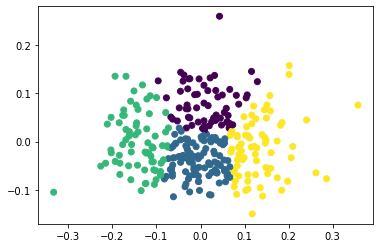

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      42  20
1      36  65
2      43  26
3      18  53 


Running kMeans for k=5


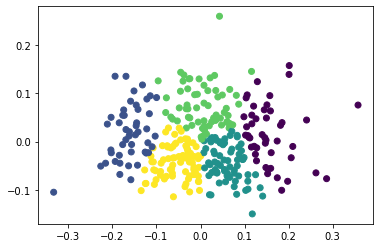

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      15  30
1      36  11
2      15  54
3      40  24
4      33  45 


Running kMeans for k=6


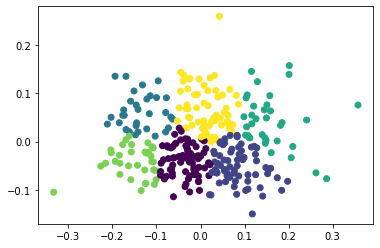

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      29  43
1      14  53
2      26   6
3      14  21
4      19  15
5      37  26 


Running kMeans for k=8


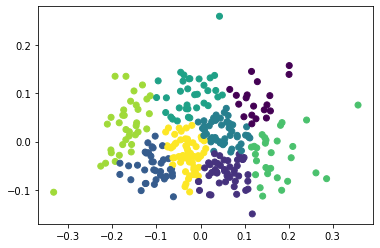

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      12   7
1       9  37
2      15  21
3      21  27
4      21  13
5       5  23
6      27   8
7      29  28 



In [3]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

for k in [3,4,5,6,8]:
    print('\nRunning kMeans for k={}'.format(k))
    # Calculate predicted values.
    y_pred = KMeans(n_clusters=k, random_state=42).fit_predict(X_pca)

    # Plot the solution.
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
    plt.show()

    # Check the solution against the data.
    print('Comparing k-means clusters against the data:')
    print(pd.crosstab(y_pred, y),'\n')

It seems that complexity starts at k=4, where borders between cluster centroids start blurring and mis-assignment may start, depending on the PCA components involved.

At k=3, the 3rd centroid can be labeled as a risk zone for individuals with a higher risk of heart disease, which may warrant close medical attention but not necessarily any treatment.